# CASE STUDY: DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

## Understanding the customer behaviour
The data available from a credit card processor identifies the types of consumer and their business spending behaviors. Hence, developing the marketing campaigns to directly address their behaviors indeed grows the revenue and these considerations will result in greater sales.

## Personalize offering based on data results
Data also reveals specific interests and needs in individual customers that a company can
leverage, this addressing their needs more efficiently. Specific promotions can be sent out
related to where these customers are located and this builds sales more quickly.

## Use trends and patterns to get new customers
The transactions and activities of the existing customers that they do in terms of purchase
behavior tends to reflect larger trends that are coming. This information provides a strategy
to go after possible customers in the target audience

## Uncover suspicious activity
The data from credit card processing is becoming increasingly important as a tool to fight
fraud. When combined with artificial intelligence, this data is being analyzed quickly to
uncover areas of purchase activity.

## Reduce chargebacks
The ability to detect suspicious activity and patterns in data can also assess whether or not a
transaction might result in a chargeback. Using analytics to track each transaction reveals
anomalies. This information can help you reject that transaction and save your business
from chargebacks.

# BUSINESS PROBLEM:
In order to effectively produce quality decisions in the modern credit card industry, knowledge
must be gained through effective data analysis and modeling. Through the use of dynamic datadriven
decision-making tools and procedures, information can be gathered to successfully evaluate
all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries
across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and
collections, respond to customer requests for help with proactive offers and service.

### Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the
customers spend & repayment behavior.
1. In the above dataset,

a. In case age is less than 18, replace it with mean of age values.

b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

c. Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
%matplotlib inline
import scipy.stats as stats

In [120]:
import os
os.getcwd()

'C:\\Users\\somjit.das\\AnalytixLabs'

In [2]:
file_path = ('F:/AnalytixLabs/Case Study 2 Credit_Card/')


In [3]:
ccd_CA = pd.read_csv(file_path + 'Customer_Acqusition.csv')
ccd_Repayment = pd.read_csv(file_path + 'Repayment.csv')
ccd_spend = pd.read_csv(file_path + 'spend.csv')

In [4]:
ccd_CA.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [5]:
ccd_Repayment.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [6]:
ccd_spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [7]:
#data cleaning for Repayment
ccd_Repayment.drop(columns = ['SL No:','Unnamed: 4'],axis =1, inplace =True)

In [8]:
ccd_Repayment.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [9]:
#missing values
ccd_Repayment.isna().sum()

Customer    23
Month       23
Amount      23
dtype: int64

In [10]:
ccd_Repayment.shape[0]

1523

In [11]:
ccd_Repayment.shape[1]

3

In [12]:
#drop the rows which contain missing values
ccd_Repayment.dropna(axis =0,inplace = True )

In [13]:
ccd_Repayment.nunique()

Customer     100
Month         74
Amount      1500
dtype: int64

In [14]:
ccd_Repayment.isna().sum()
#no missing value

Customer    0
Month       0
Amount      0
dtype: int64

In [15]:
#change the type of month column from object to datetime
ccd_Repayment['Month'] = ccd_Repayment['Month'].apply(lambda y: pd.to_datetime(y))
ccd_Repayment.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [16]:
ccd_spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [17]:
ccd_spend['Month'] = ccd_spend['Month'].apply(lambda x: pd.to_datetime(x))

In [18]:
ccd_spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13


In [19]:
ccd_spend.isna().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [20]:
ccd_spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13


In [21]:
ccd_spend.drop(columns = 'Sl No:', axis = 1,inplace =True )


In [22]:
ccd_spend.head(2)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13


In [23]:
ccd_CA.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [24]:
ccd_CA.isna().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [25]:
ccd_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [26]:
ccd_CA.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


### 1a. In case age is less than 18, replace it with mean of age values.

In [27]:
ccd_CA['Age']= np.where(ccd_CA['Age']<18,ccd_CA.Age.mean(),ccd_CA.Age)

In [28]:
ccd_CA[ccd_CA.Age<18]

,No,Customer,Age,City,Product,Limit,Company,Segment


In [29]:
ccd_CA.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [30]:
ccd_spend.head(2)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13


In [31]:
ccd_Repayment.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [32]:
ccd_Spend_Transaction = pd.merge(left = ccd_CA, right = ccd_spend, on = 'Customer', how ='inner', indicator = True  )

In [33]:
ccd_Spend_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,both


In [34]:
ccd_Spend_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Age       1500 non-null   float64       
 3   City      1500 non-null   object        
 4   Product   1500 non-null   object        
 5   Limit     1500 non-null   float64       
 6   Company   1500 non-null   object        
 7   Segment   1500 non-null   object        
 8   Month     1500 non-null   datetime64[ns]
 9   Type      1500 non-null   object        
 10  Amount    1500 non-null   float64       
 11  _merge    1500 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 142.2+ KB


### 1b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [35]:
ccd_Spend_Transaction ['Amount'] =np.where(ccd_Spend_Transaction.Amount > ccd_Spend_Transaction.Limit, 0.5 * ccd_Spend_Transaction.Limit,ccd_Spend_Transaction.Amount )

In [36]:
ccd_Spend_Transaction.tail(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,both
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,both
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,both
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,both
1499,100,A100,36.0,COCHIN,Silver,100000.0,C5,Salaried_MNC,2004-01-25,BUS TICKET,50000.00,both


### 1c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [37]:
ccd_Repayment_Transaction = pd.merge(left = ccd_CA , right = ccd_Repayment,on ='Customer', how ='inner', indicator = True )

In [38]:
ccd_Repayment_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,both


In [39]:
ccd_Repayment_Transaction.shape

(1500, 11)

In [40]:
ccd_Repayment_Transaction ['Amount'] =np.where(ccd_Repayment_Transaction ['Amount'] > ccd_Repayment_Transaction ['Limit'], ccd_Repayment_Transaction ['Limit'],ccd_Repayment_Transaction ['Amount'] )

In [41]:
ccd_Repayment_Transaction.tail(4)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,_merge
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,both
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,both
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,both
1499,100,A100,36.0,COCHIN,Silver,100000.0,C5,Salaried_MNC,2004-01-25,69551.19,both


### 2. From the above dataset create the following summaries:
a. How many distinct customers exist?

In [42]:
ccd_Spend_Transaction.Customer.nunique()

100

In [43]:
ccd_Repayment_Transaction.Customer.nunique()

100

#### b. How many distinct categories exist?

In [44]:
ccd_Spend_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,both


In [45]:
ccd_Repayment_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,both


In [46]:
ccd_Spend_Transaction.Product.nunique()

3

In [47]:
ccd_Repayment_Transaction.Product.nunique()

3

#### c. What is the average monthly spend by customers?

In [48]:
ccd_Spend_Transaction['Month1'] =pd.DatetimeIndex(ccd_Spend_Transaction.Month).month

In [49]:
ccd_Spend_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge,Month1
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,both,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,both,1


In [50]:
ccd_Spend_Transaction.groupby(['Month1','Customer'])[['Amount']].mean()

Amount
Month1 Customer               
1      A1        372762.587143
       A10       161144.326667
       A100       50000.000000
       A11       130298.903333
       A12       343885.410000
...                        ...
12     A54       155708.160000
       A56       223628.270000
       A58        50001.000000
       A61        62914.030000
       A64       393513.710000

[578 rows x 1 columns]

In [51]:
ccd_ST = ccd_Spend_Transaction.groupby(['Month1','Customer'])[['Amount']].mean()

#### d. What is the average monthly repayment by customers?

In [52]:
ccd_Repayment_Transaction['Month1'] =pd.DatetimeIndex(ccd_Spend_Transaction.Month).month

In [53]:
ccd_Repayment_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,_merge,Month1
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,both,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,both,1


In [54]:
ccd_Repayment_Transaction.groupby(['Month1','Customer'])[['Amount']].mean()

Amount
Month1 Customer               
1      A1        340554.088571
       A10       426652.510000
       A100       69551.190000
       A11       381231.040000
       A12       275945.040000
...                        ...
12     A54       215719.140000
       A56       113871.650000
       A58        30540.350000
       A61       494436.860000
       A64       212614.480000

[578 rows x 1 columns]

In [55]:
ccd_RT = ccd_Repayment_Transaction.groupby(['Month1','Customer'])[['Amount']].mean()

#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [56]:
Avg_Monthly_Customers = pd.merge(left = ccd_ST,right = ccd_RT, on= ['Month1', 'Customer'], suffixes =('_ST','_RT'), indicator =True)

In [57]:
Avg_Monthly_Customers['Monthly_Profit'] = Avg_Monthly_Customers.Amount_RT - Avg_Monthly_Customers.Amount_ST
Avg_Monthly_Customers['Profit'] =np.where(Avg_Monthly_Customers['Monthly_Profit'] >0 ,Avg_Monthly_Customers['Monthly_Profit']*2.9/100,0)

In [58]:
Avg_Monthly_Customers

Amount_ST      Amount_RT _merge  Monthly_Profit  \
Month1 Customer                                                        
1      A1        372762.587143  340554.088571   both   -32208.498571   
       A10       161144.326667  426652.510000   both   265508.183333   
       A100       50000.000000   69551.190000   both    19551.190000   
       A11       130298.903333  381231.040000   both   250932.136667   
       A12       343885.410000  275945.040000   both   -67940.370000   
...                        ...            ...    ...             ...   
12     A54       155708.160000  215719.140000   both    60010.980000   
       A56       223628.270000  113871.650000   both  -109756.620000   
       A58        50001.000000   30540.350000   both   -19460.650000   
       A61        62914.030000  494436.860000   both   431522.830000   
       A64       393513.710000  212614.480000   both  -180899.230000   

                       Profit  
Month1 Customer                
1      A1            0.000000  
       A10        7699.737317  
       A100        566.984510  
       A11        7277.031963  
       A12           0.000000  
...                       ...  
12     A54        1740.318420  
       A56           0.000000  
       A58           0.000000  
       A61       12514.162070  
       A64           0.000000  

[578 rows x 5 columns]

#### f. What are the top 5 product types?

In [59]:
ccd_Spend_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge,Month1
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,both,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,both,1


In [60]:
ccd_Spend_Transaction.groupby('Type')[['Amount']].sum().sort_values(by ='Amount', ascending = False)

,Amount
Type,
PETRO,28597384.98
CAMERA,27690738.44
FOOD,20519243.60
AIR TICKET,20155847.12
TRAIN TICKET,19995825.72
SHOPPING,17106660.97
BUS TICKET,16279935.35
MOVIE TICKET,13001899.29
CLOTHES,12302511.36


#### g. Which city is having maximum spend?

In [61]:
ccd_Spend_Transaction.groupby('City')[['Amount']].sum().sort_values(by ='Amount', ascending = False)

,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


In [62]:
ccd_Spend_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge,Month1
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,both,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,both,1


#### h. Which age group is spending more money?

In [63]:
ccd_Spend_Transaction ['Age Group'] = np.where((ccd_Spend_Transaction.Age < 18),'<18',
                            np.where ((ccd_Spend_Transaction.Age >= 18) & (ccd_Spend_Transaction.Age <= 30),'18-30', 
                        np.where ((ccd_Spend_Transaction.Age >= 31) & (ccd_Spend_Transaction.Age <= 50),'31-50','>50')))

In [64]:
ccd_Spend_Transaction.groupby('Age Group')[['Amount']].sum().sort_values(by ='Age Group', ascending = False)

,Amount
Age Group,
>50,72713511.57
31-50,94377675.45
18-30,52689898.21


#### i. Who are the top 10 customers in terms of repayment?

In [65]:
ccd_Repayment_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,_merge,Month1
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,both,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,both,1


In [66]:
ccd_Repayment_Transaction.groupby('Customer')[['Amount']].sum().sort_values(by ='Amount', ascending = False).reset_index().head(10)

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [67]:
ccd_Spend_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge,Month1,Age Group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,both,1,>50
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,both,1,>50


In [68]:
ccd_Spend_Transaction['Year'] = pd.DatetimeIndex(ccd_Spend_Transaction.Month).year

In [69]:
ccd_Spend_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge,Month1,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,both,1,>50,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,both,1,>50,2004


In [70]:
city_data_spend = ccd_Spend_Transaction.pivot_table(values = 'Amount',index ='City', columns = ['Product','Year'], aggfunc ='sum')
city_data_spend

Product           Gold                              Platimum              \
Year              2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

Product                     Silver                         
Year              2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

In [71]:
city_data_spend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, BANGALORE to TRIVANDRUM
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Gold, 2004)      8 non-null      float64
 1   (Gold, 2005)      8 non-null      float64
 2   (Gold, 2006)      8 non-null      float64
 3   (Platimum, 2004)  8 non-null      float64
 4   (Platimum, 2005)  8 non-null      float64
 5   (Platimum, 2006)  8 non-null      float64
 6   (Silver, 2004)    8 non-null      float64
 7   (Silver, 2005)    8 non-null      float64
 8   (Silver, 2006)    8 non-null      float64
dtypes: float64(9)
memory usage: 640.0+ bytes


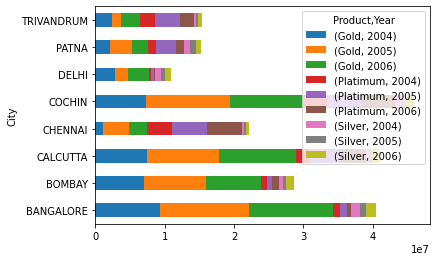

In [72]:
city_data_spend.plot( kind = 'barh',stacked = True)
plt.show()

### 4. Create graphs for

#### a. Monthly comparison of total spends, city wise

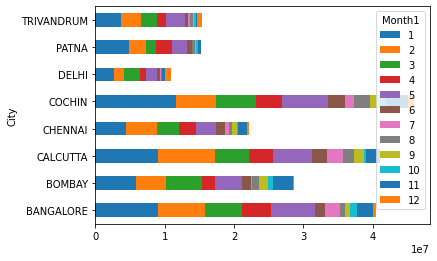

In [73]:
ccd_Spend_Transaction.pivot_table(values = 'Amount',index = 'City',columns = 'Month1', aggfunc ='sum').plot( kind = 'barh',stacked = True)
plt.show()

#### b. Comparison of yearly spend on air tickets

In [74]:
ccd_Spend_Transaction.head(10)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge,Month1,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,both,1,>50,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,both,1,>50,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,both,1,>50,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,both,1,>50,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,both,1,>50,2005
5,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-23,SANDALS,168285.60,both,2,>50,2005
6,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-02-01,CAR,23370.20,both,2,>50,2005
7,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,TRAIN TICKET,440563.22,both,1,>50,2004
8,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-02-05,BUS TICKET,52208.65,both,2,>50,2004
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,both,4,>50,2006


In [75]:
ccd_new=ccd_Spend_Transaction.loc[ccd_Spend_Transaction['Type']=='AIR TICKET']
ccd_new.head(4)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge,Month1,Age Group,Year
9,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,both,4,>50,2006
63,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,2006-03-03,AIR TICKET,5001.00,both,3,>50,2006
80,6,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,2006-04-03,AIR TICKET,50000.00,both,4,>50,2006
97,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2006-05-03,AIR TICKET,50000.50,both,5,18-30,2006


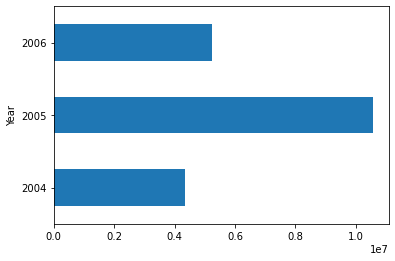

In [76]:
ccd_new.groupby('Year')['Amount'].sum().plot( kind ='barh', x ='Amount')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [77]:
ccd_Spend_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,_merge,Month1,Age Group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,both,1,>50,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,both,1,>50,2004


In [78]:
ccd_Spend_Transaction.select_dtypes('float64').apply(lambda x:x.sum())

Age       6.864130e+04
Limit     4.469909e+08
Amount    2.197811e+08
dtype: float64

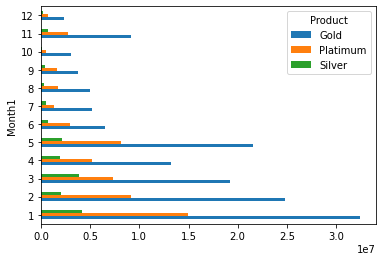

In [79]:
pd.pivot_table(data =ccd_Spend_Transaction,values = 'Amount', index ='Month1', columns = 'Product',aggfunc ='sum').plot(kind = 'barh')
plt.show()

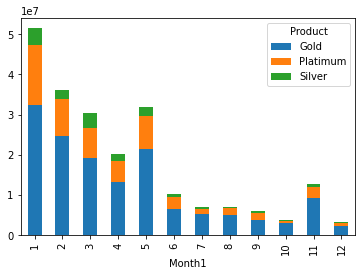

In [80]:
pd.pivot_table(data =ccd_Spend_Transaction,values = 'Amount', index = 'Month1', columns = 'Product',aggfunc ='sum').plot(kind = 'bar', stacked = True)
plt.show()

In [81]:
def func_D(x):
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 /n_total
    return pd.Series([x.dtype, x.nunique(),n_total, n_miss, perc_miss ,x.count(),
                      x.sum(),x.min(),x.mean(),
                      x.quantile(0.25),x.quantile(0.5),x.quantile(0.75),x.max()],
                    index = ['d_type','cardinality','n_tot','n_miss','perc_miss','count',
                             'sum','min','mean',
                             '25%','50%','75%','max'])

In [82]:
ccd_Spend_Transaction.select_dtypes('float64').apply(func_D)

,Age,Limit,Amount
d_type,float64,float64,float64
cardinality,52,8,900
n_tot,1500,1500,1500
n_miss,0,0,0
perc_miss,0.0,0.0,0.0
count,1500,1500,1500
sum,68641.3,446990935.0,219781085.23
min,19.0,10000.0,720.3
mean,45.760867,297993.956667,146520.723487
25%,32.0,100000.0,50000.0


### 5. Write user defined PYTHON function to perform the following analysis: 
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month.


The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [83]:
ccd_Repayment_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,_merge,Month1
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,both,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,both,1


In [116]:
ccd_Repayment_Transaction['yearly']=ccd_Repayment_Transaction.Month.apply(lambda x:x.year)
ccd_Repayment_Transaction['monthly']=ccd_Repayment_Transaction.Month.apply(lambda x:x.month)
ccd_Repayment_Transaction.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,_merge,Month1,yearly,monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,both,1,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,both,1,2004,1


In [117]:
#User defined function
def top10customers(Product_C, time_period):
    return ccd_Repayment_Transaction.loc[(ccd_Repayment_Transaction.Product == Product_C )].groupby(['Customer','Age','City','Product', time_period]).Amount.sum().reset_index().sort_values('Amount', ascending = False).head(10)

In [118]:
Product_C = str(input("Please input Gold / Silver /Platinum : "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please input Gold / Silver /Platinum : Gold
Please Enter Time Period and time period should be in yearly/monthly: yearly


In [119]:
top10Customers_Analysis= top10customers(Product_C,time_period)

In [102]:
top10Customers_Analysis

,Customer,Age,City,Product,Amount
20,A60,28.00,CALCUTTA,Gold,11020930.98
21,A61,44.00,COCHIN,Gold,9002326.39
4,A13,29.00,BANGALORE,Gold,8231607.26
3,A12,51.00,BOMBAY,Gold,8183050.64
5,A14,46.49,BANGALORE,Gold,7661086.20
16,A42,50.00,BOMBAY,Gold,7116225.74
19,A45,67.00,COCHIN,Gold,6990244.10
10,A27,24.00,CHENNAI,Gold,6948235.19
9,A26,38.00,PATNA,Gold,6876389.81
17,A43,21.00,BANGALORE,Gold,6707787.92
